<a href="https://colab.research.google.com/github/orudda/Ising-Model-using-Metropolis-algorithm/blob/main/ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import random, math, pylab
# from numba.decorators import jit

#Cod fonte

In [ ]:
@jit(nopython=True)
def estado_ini(N):
    #Gera um estadon inicial aleatório para rede
    s = np.zeros(N,dtype=np.int8)
    for i in range(N):
        s[i] = np.sign(2*np.random.random()-1)
    return s

@jit(nopython=True)
def vizinhos(L,N):
    #Define a tabela de vizinhos 
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L 
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1 
        if k % L == 0: viz[k,2] = k+L-1
        viz[k,3] = k-L 
        if k < L: viz[k,3] = k+N-L
    return viz

@jit(nopython=True)
def energia(s, viz, N):
    #Calcula a energia da configuração s
    ener = 0 
    for i in range(N):
        h = s[viz[i,0]]+s[viz[i,1]]
        ener -= s[i]*h
    ener = int((ener+2*N)/4)
    return ener


@jit(nopython=True)
def expos(beta):
  ex = np.zeros(5,dtype=np.float32)
  ex[0]=np.exp(8.0*beta)
  ex[1]=np.exp(4.0*beta)
  ex[2]=0.0
  ex[3]=np.exp(-4.0*beta)
  ex[4]=np.exp(-8.0*beta)
  return ex

@jit(nopython=True)
def mcstep(beta,s,viz,ener,mag):
  N=len(s)
  ex=expos(beta)
  for i in range(N):
    h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]] # soma dos vizinhos
    de = int(s[i]*h*0.5+2)
    if (np.random.random() < ex[de]):
      ener=ener+2*s[i]*h
      mag -= 2*s[i]
      s[i]=-s[i]
  return ener,mag,s

            
def rotina(s,l,n,t,steps,trash):
  viz = vizinhos(l,n)
  ener = energia(s, viz, n)
  beta = 1/t
  mag = s.sum()
  
  ener_v = np.zeros(steps-trash)
  mag_v = np.zeros(steps-trash)
  calculado
  for i in range(steps):
    ener,mag,s = mcstep(beta,s,viz,ener,mag)
    if (i >= trash):
      ener_v[i-trash] = ener
      mag_v[i-trash] = mag

  return s, ener_v, mag_v


def cv_suscep(x, x_2, t, ind):
  beta = 1/t
  n = 10**6
  result =  (beta*(x_2 - (x**2)))/n
  if (ind == 'cv'):
    return result*beta
  else:
    return result


def quadrados(ener_v , mag_v):
  ener_v_quadrado = np.zeros(len(mag_v))
  mag_v_quadrado = np.zeros(len(mag_v))
  for j in range(len(mag_v)):
    ener_v_quadrado[j] = ener_v[j]**2
    mag_v_quadrado[j] = mag_v[j]**2
  
  return ener_v_quadrado, mag_v_quadrado

def erro(x):
  n=10
  soma = 0
  mean = np.array(x).mean()
  for i in range(len(x)):
    soma += (mean - x[i])**2
  return (soma/(n*(n-1)))**(1/2)


def show(title, t, label_18, label_24, label_36, name_18, name_24, name_36, xlabel, ylabel):
    plt.plot(t,label_18, label = name_18, color='blue')
    plt.plot(t,label_24, label = name_24, color='black')
    plt.plot(t,label_36, label = name_36, color='yellow')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    print('\n')

In [ ]:
def simula(l,n,s,step,trash,t):
  cv_result = []
  cv_erro = []
  suscep_result = []
  suscep_erro = []
  ener_result = []
  ener_erro = []
  mag_result = []
  mag_erro = []
  for i in t:
    s, ener_v, mag_v = rotina(s,l,n,i,steps,trash)
    for j in range(len(mag_v)):
      mag_v[j]=abs(mag_v[j])
    ener_v_quadrado, mag_v_quadrado = quadrados(ener_v, mag_v)
    #vetores auxiliares
    cv = []
    suscep = []
    ener_spin = []
    mag = []


    for j in range(len(ener_v)):
      if ((j%(10**5))==0):
        pos_final = j + (10**5)+1
        
        #energia
        vet_e = ener_v[j:pos_final]
        vet_e_quadrado = ener_v_quadrado[j:pos_final]
        media_e = np.array(vet_e).mean()
        
        #magnetização
        vet_mag = mag_v[j:pos_final]
        vet_mag_quadrado = mag_v_quadrado[j:pos_final]
        media_mag = np.array(vet_mag).mean()
        
        #cv e susceptibilidade
        result_cv = cv_suscep(media_e, np.array(vet_e_quadrado).mean(), i, 'cv')
        result_suscep = cv_suscep(media_mag, np.array(vet_mag_quadrado).mean(), i, 's')
      
      #alocando resultados e erros
      ener_spin.append(media_e/n)#energia por spin entao deve dividir por n
      mag.append(media_mag)
      cv.append(result_cv)
      suscep.append(result_suscep)


    #alocando resultados finais
    ener_result.append(np.array(ener_spin).mean())
    ener_erro.append(erro(ener_spin))

    mag_result.append(np.array(mag).mean())
    mag_erro.append(erro(mag))

    cv_result.append(np.array(cv).mean())
    cv_erro.append(erro(cv))

    suscep_result.append(np.array(suscep).mean())
    suscep_erro.append(erro(suscep))

  return ener_result, ener_erro, mag_result, mag_erro, cv_result, cv_erro, suscep_result, suscep_erro

#simulações

In [ ]:
#tempo
t = np.linspace(1,5,17)
t = sorted(t,reverse=True)

# setando numero fixo de pasos
steps=int((1.1)*(10**6))
trash = 10**5

In [ ]:
#rede de tamanho 18
l=18
n = l**2
s = estado_ini(n)

ener_result, ener_erro, mag_result, mag_erro, cv_result, cv_erro, suscep_result, suscep_erro = simula(l,n,s,steps,trash,t)

In [ ]:
#rede de tamanho 24
l=24
n = l**2
s = estado_ini(n)

ener_result_24, ener_erro_24, mag_result_24, mag_erro_24, cv_result_24, cv_erro_24, suscep_result_24, suscep_erro_24 = simula(l,n,s,steps,trash,t)

In [ ]:
#rede de tamanho 36
l=36
n = l**2
s = estado_ini(n)

ener_result_36, ener_erro_36, mag_result_36, mag_erro_36, cv_result_36, cv_erro_36, suscep_result_36, suscep_erro_36 = simula(l,n,s,steps,trash,t)

##Resultado energia por spin

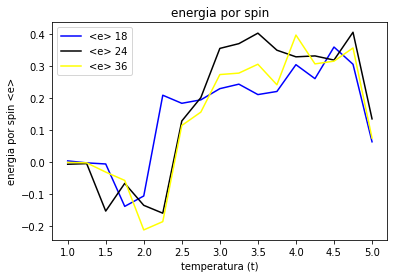

In [ ]:
title = 'energia por spin'
xlabel = 'temperatura (t)'
ylabel = 'energia por spin <e>'
show(title, t, ener_result, ener_result_24, ener_result_36, '<e> 18', '<e> 24', '<e> 36', xlabel, ylabel)

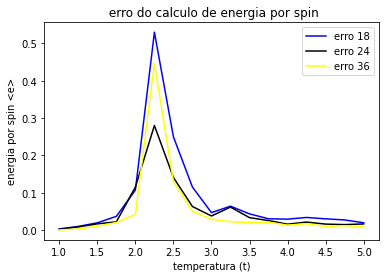

In [ ]:
title = ' erro do calculo de energia por spin'
xlabel = 'temperatura (t)'
ylabel = 'energia por spin <e>'
show(title, t, ener_erro, ener_erro_24, ener_erro_36, 'erro 18', 'erro 24', 'erro 36', xlabel, ylabel)

##Resultado magnetização

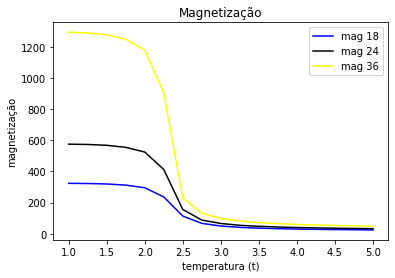

In [ ]:
title = 'Magnetização'
xlabel = 'temperatura (t)'
ylabel = 'magnetização'
show(title, t, mag_result, mag_result_24, mag_result_36, 'mag 18', 'mag 24', 'mag 36', xlabel, ylabel)

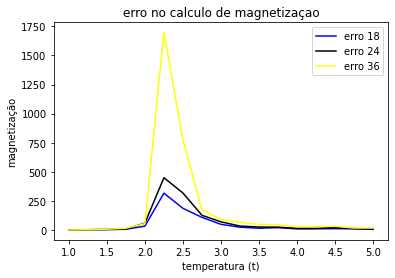

In [ ]:
title = 'erro no calculo de magnetizaçao'
xlabel = 'temperatura (t)'
ylabel = 'magnetização'
show(title, t, mag_erro, mag_erro_24, mag_erro_36, 'erro 18', 'erro 24', 'erro 36', xlabel, ylabel)

##Resultado Cv

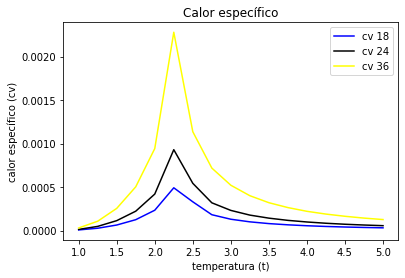

In [ ]:
title = 'Calor específico'
xlabel = 'temperatura (t)'
ylabel = 'calor específico (cv)'
show(title, t, cv_result, cv_result_24, cv_result_36, 'cv 18', 'cv 24', 'cv 36', xlabel, ylabel)

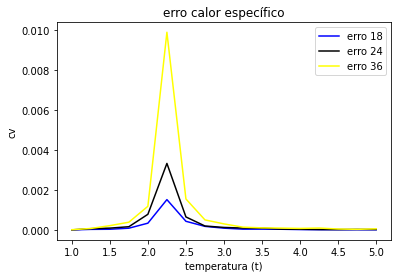

In [ ]:
title = 'erro calor específico'
xlabel = 'temperatura (t)'
ylabel = 'cv'
show(title, t, cv_erro, cv_erro_24, cv_erro_36, 'erro 18', 'erro 24', 'erro 36', xlabel, ylabel)

##Resultado Susceptibilidade magnética

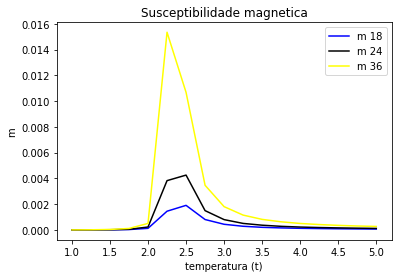

In [ ]:
title = 'Susceptibilidade magnetica'
xlabel = 'temperatura (t)'
ylabel = 'm'
show(title, t, suscep_result, suscep_result_24, suscep_result_36, 'm 18', 'm 24', 'm 36', xlabel, ylabel)

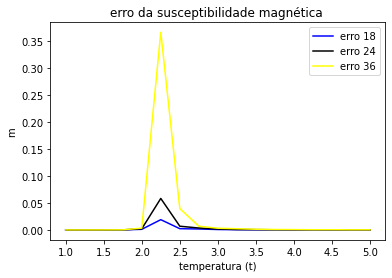

In [ ]:
title = 'erro da susceptibilidade magnética '
xlabel = 'temperatura (t)'
ylabel = 'm'
show(title, t, suscep_erro, suscep_erro_24, suscep_erro_36, 'erro 18', 'erro 24', 'erro 36', xlabel, ylabel)

# Relatório


Comparando com o modelo de Wang Landau é possível notar a semelhança dos resultados. Neste caso os gráficos estão descritos com linhas retas por apenas terem 17 pontos de temperatura que o determinaram mas é possível ver o comportamento de cada medida, seus pontos máximos e tendências semelhantes ao modelo de Wang Landau.

É possível notar também que a partir de determinado ponto os gráficos apresentam tendências e mostram uma expectativa de resultados para amostragens extremamente grandes ou infinitas. A energia por spin, por exemplo, decresce um certo ponto, depois um aumento exponêncial e se estabiliza em um determinado ponto de alta e para ter uma variação muito grande desse valor, seria necessário fornecer temperaturas altíssimas. A magnetização, no entanto, tende a zero muito rápido como é esperado, ou seja,se fornecido uma temperatura muito alta a um sistema há tendência de perda de magnetização. O calor específico e a susceptibilidade magnética, por outro lado, apresentam picos em temperaturas aproximadamente igual a 2.5 e depois se estabilizam no ponto inicial mostrando uma tendência a permanecerem estáticos para amostragens maiores.

Finalmente, o fator curioso desse experimento é que os erros estatísticos das medidas possuem comportamentos semelhantes. Todas as medidas tiveram gráficos de erros estatístico apresentando uma tendência de aumento em 2, pico em 2.5 aproximadamente e estabilização em 3. Este fato deve ocorrer pois deve ser o ponto de maior flutuação das medidas e então um maior erro calculado, ou seja, é o ponto onde os valores sofrem mais alterações em função da temperatura.  
